In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.font_manager
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from matplotlib import cm
from shapely import geometry
from descartes import PolygonPatch

from PIL import Image

In [2]:
from aux_func_States import getLegend
from aux_func_States import equals

In [3]:
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'

matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams.update({'font.size': 20})

In [4]:
labelD={'W':'W','O':'O','WO':'W/O',
        'E':'E','EM':'E/M','M':'M',
        'E/O':'E-O','E/W':'E-W','E/WO':'E-W/O',
        'EM/O':'E/M-O','EM/W':'E/M-W','EM/WO':'E/M-W/O',
        'M/O':'M-O','M/W':'M-W','M/WO':'M-W/O'}

In [5]:
def getColor(label):
    
    ### Reduced EMT states
    if equals(label,['E']):
        return 'r'
    if equals(label,['M']):
        return 'b'
    if equals(label,['EM']):
        return 'y'
    if equals(label,['E','M']):
        return 'purple'
    if equals(label,['E','EM']):
        return 'orange'
    if equals(label,['M','EM']):
        return 'g'
    if equals(label,['E','M','EM']):
        return 'k'
    
    ### REduced to Metabolic states
    if equals(label,['W']):
        return 'r'
    if equals(label,['O']):
        return 'b'
    if equals(label,['WO']):
        return 'y'
    if equals(label,['W','O']):
        return 'purple'
    if equals(label,['W','WO']):
        return 'orange'
    if equals(label,['O','WO']):
        return 'g'
    if equals(label,['O','W','WO']):
        return 'k'
    
    ### make the all 9 coupled states always be black
    if equals(label,['E/O','E/WO','EM/O','M/O','EM/WO','M/WO','M/W','EM/W','E/W']):
        return 'k'
    
    
    ##generate the color dictionary based on the keys so that you can easily add results (511 total possible combos)
    keys=[  ['E/W'],['M/W'],['EM/W'],
            ['E/O'],['M/O'],['EM/O'],
            ['E/WO'],['M/WO'],['EM/WO'],

            ['E/O','EM/WO'],
            ['E/O','E/WO'],
            ['E/O','E/W'],

            ['E/O','E/W','E/WO'],
            ['E/O','E/WO','EM/W'],
            ['E/O','E/WO','M/W'],
            ['E/O','EM/W','EM/WO'],
            ['E/O','M/W','EM/WO'],
            ['E/O','M/W','M/WO'],
            ['M/W','M/WO','M/O'],
            ['E/O','EM/O','M/O'],

            ['E/O','EM/WO','M/W','M/WO'],
            ['E/W','EM/WO','M/O','M/WO'],
            ['E/WO','EM/WO','M/O','M/WO'],
            ['E/W','EM/W','M/O','M/WO'],
            ['E/W','E/WO','E/O','M/W'],
            ['EM/O','M/W','M/WO','M/O'],
            ['E/O','EM/O','M/O','M/W'],

            ['E/W','EM/W','M/O','M/W','M/WO'],
            ['E/WO','EM/O','EM/WO','M/O','M/WO'],
            ['E/W','EM/WO','M/W','M/O','M/WO'],
            ['E/WO','EM/WO','M/W','M/O','M/WO'],
            ['E/O','E/W','E/WO','EM/W','M/W'],
            ['E/O','E/W','E/WO','M/WO','M/W'],
            ['E/O','EM/O','M/O','M/WO','M/W'],
            ['EM/WO','EM/O','M/O','M/WO','M/W'],

            ['E/O','E/WO','EM/O','EM/WO','M/O','M/WO'],
            ['E/WO','EM/O','EM/WO','M/O','M/W','M/WO'],
            ['E/O','E/W','E/WO','EM/W','M/WO','M/W'],
            ['E/O','E/W','E/WO','M/O','M/WO','M/W'],
            ['E/O','EM/O','EM/WO','M/O','M/W','M/WO'],
            ['EM/W','EM/O','EM/WO','M/O','M/W','M/WO'],
            ['E/O','EM/O','EM/W','M/O','M/W','M/WO'],

            ['E/O','E/WO','EM/O','EM/WO','M/WO','M/O','M/W'],
            ['E/O','E/WO','E/W','EM/W','M/WO','M/O','M/W'],
            ['E/O','EM/WO','EM/O','EM/W','M/WO','M/O','M/W'],

            ['E/O','E/WO','EM/O','EM/W','EM/WO','M/O','M/WO','M/W'],
            ['E/O','E/WO','E/W','EM/W','EM/WO','M/W','M/O','M/WO'],
             ]
    
    __clist=[]
    cmap1= cm.get_cmap('tab20b')
    cmap2= cm.get_cmap('tab20c')
    count,base=0,0
    for i in range(20):
        __clist+=[matplotlib.colors.to_hex(cmap1(base+count*4))]
        __clist+=[matplotlib.colors.to_hex(cmap2(base+count*4))]
        count+=1
        if count==5:
                count=0
                base+=1
    __clist+=['yellow','beige','chartreuse','cyan','lime','magenta','darkviolet','blue','red','saddlebrown']
                
    cmap = matplotlib.cm.get_cmap('hsv')
    norm = matplotlib.colors.Normalize(vmin=0.0, vmax=len(keys))

    for i in range(len(keys)):
        if equals(label,keys[i]):
            if i>=len(__clist):
                print "NEED MORE COLORS"
            return __clist[i%len(__clist)]
            #return cmap(norm(i))

In [6]:
def colorMap(fileN,reduced=None):
    df = pd.read_csv(fileN)
    lab={}
    if reduced:
        keys=['E','EM','M','W','O','WO']
        mainKey='col'
    else:
        keys=['E/O','E/WO','E/W','EM/O','EM/WO','EM/W','M/O','M/WO','M/W']
        mainKey='t3'
    for i in range(len(df.values)):
        tmp=[]
        for key in keys:
            if key in df.keys():
                if df[key].values[i]==1:
                    tmp+=[key]
        lab[df[mainKey].values[i]] =tmp
        
    return lab

/home/madeline/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


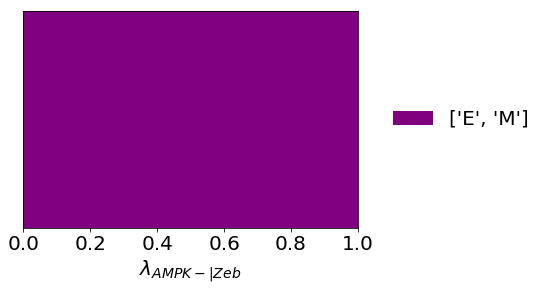

In [7]:
###########
fig = plt.figure()
labs = colorMap("data/d_no_EM_AZ_red_legend.txt",reduced=True)
df = pd.read_csv("data/d_no_EM_AZ_red.txt")
check=[]
for i in range(len(df)):
    if df['color'].values[i] not in check:
        plt.fill_between([df['X1'].values[i],df['X2'].values[i]],-10.,110.,facecolor=getColor(labs[df['color'].values[i]]),linewidth=0.0,label=labs[df['color'].values[i]])
        check+=[df['color'].values[i]]
    else:
        plt.fill_between([df['X1'].values[i],df['X2'].values[i]],-10.,110.,facecolor=getColor(labs[df['color'].values[i]]),linewidth=0.0)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),frameon=False)
plt.yticks([])
plt.xlim(0,1)
plt.ylim(0,100)
plt.xlabel("$\lambda_{AMPK-|Zeb}$")
fig.savefig("figures/noEM_AZ_red.png",bbox_inches='tight')

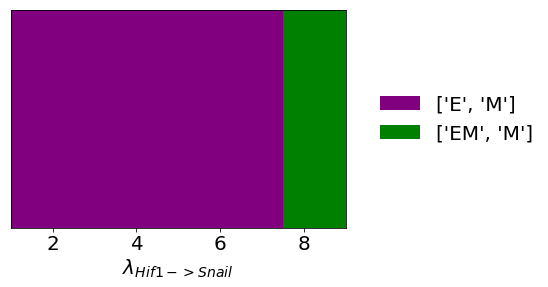

In [8]:
###########

fig = plt.figure()
labs = colorMap("data/d_no_EM_HS_red_legend.txt",reduced=True)
df = pd.read_csv("data/d_no_EM_HS_red.txt")
check=[]
for i in range(len(df)):
    if df['color'].values[i] not in check:
        plt.fill_between([df['X1'].values[i],df['X2'].values[i]],-10.,110.,facecolor=getColor(labs[df['color'].values[i]]),linewidth=0.0,label=labs[df['color'].values[i]])
        check+=[df['color'].values[i]]
    else:
        plt.fill_between([df['X1'].values[i],df['X2'].values[i]],-10.,110.,facecolor=getColor(labs[df['color'].values[i]]),linewidth=0.0)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),frameon=False)
plt.yticks([])
plt.xlim(1,9)
plt.ylim(0,100)
plt.xlabel("$\lambda_{Hif1->Snail}$")
fig.savefig("figures/noEM_HS_red.png",bbox_inches='tight')

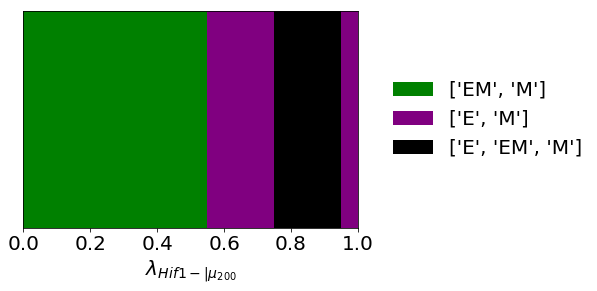

In [9]:
###########
fig = plt.figure()
labs = colorMap("data/d_no_EM_Hu_red_legend.txt",reduced=True)
df = pd.read_csv("data/d_no_EM_Hu_red.txt")
check=[]
for i in range(len(df)):
    if df['color'].values[i] not in check:
        plt.fill_between([df['X1'].values[i],df['X2'].values[i]],-10.,110.,facecolor=getColor(labs[df['color'].values[i]]),linewidth=0.0,label=labs[df['color'].values[i]])
        check+=[df['color'].values[i]]
    else:
        plt.fill_between([df['X1'].values[i],df['X2'].values[i]],-10.,110.,facecolor=getColor(labs[df['color'].values[i]]),linewidth=0.0)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),frameon=False)
plt.yticks([])
plt.xlim(0,1)
plt.ylim(0,100)
plt.xlabel("$\lambda_{Hif1-|\mu_{200}}$")
fig.savefig("figures/noEM_Hu_red.png",bbox_inches='tight')

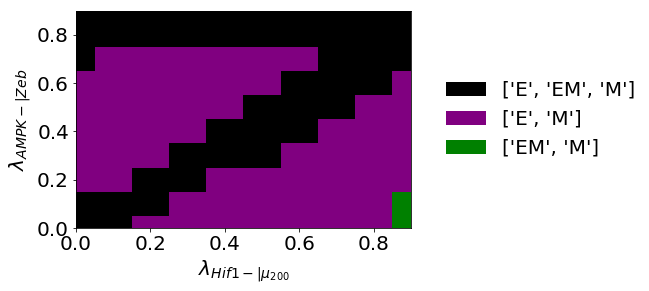

In [10]:
###########
fig = plt.figure()
labs = colorMap("data/d_no_EM_AZ_Hu_red_legend.txt",reduced=True)
df = pd.read_csv("data/d_no_EM_AZ_Hu_red.txt")
check=[]
for i in range(len(df)):
    if df['color'].values[i] not in check:
        plt.fill_between([df['X1'].values[i],df['X2'].values[i]],df['Y1'].values[i],df['Y2'].values[i],facecolor=getColor(labs[df['color'].values[i]]),linewidth=0.0,label=labs[df['color'].values[i]])
        check+=[df['color'].values[i]]
    else:
        plt.fill_between([df['X1'].values[i],df['X2'].values[i]],df['Y1'].values[i],df['Y2'].values[i],facecolor=getColor(labs[df['color'].values[i]]),linewidth=0.0)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),frameon=False)
#plt.yticks([])
plt.xlim(0,0.9)
plt.ylim(0,0.9)
plt.xlabel("$\lambda_{Hif1-|\mu_{200}}$")
plt.ylabel("$\lambda_{AMPK-|Zeb}$")
fig.savefig("figures/noEM_AZ_Hu_red.png",bbox_inches='tight')

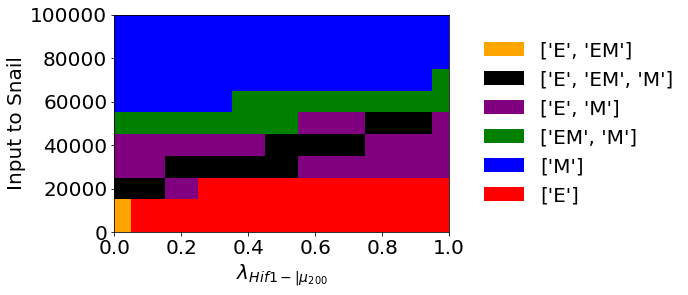

In [11]:
###########
fig = plt.figure()
labs = colorMap("data/d_no_EM_Hu_input_red_legend.txt",reduced=True)
df = pd.read_csv("data/d_no_EM_Hu_input_red.txt")
check=[]
for i in range(len(df)):
    if df['color'].values[i] not in check:
        plt.fill_between([df['X1'].values[i],df['X2'].values[i]],df['Y1'].values[i],df['Y2'].values[i],facecolor=getColor(labs[df['color'].values[i]]),linewidth=0.0,label=labs[df['color'].values[i]])
        check+=[df['color'].values[i]]
    else:
        plt.fill_between([df['X1'].values[i],df['X2'].values[i]],df['Y1'].values[i],df['Y2'].values[i],facecolor=getColor(labs[df['color'].values[i]]),linewidth=0.0)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),frameon=False)
#plt.yticks([])
plt.xlim(0,1)
plt.ylim(0,100000)
plt.xlabel("$\lambda_{Hif1-|\mu_{200}}$")
plt.ylabel("Input to Snail")
fig.savefig("figures/noEM_Hu_input_red.png",bbox_inches='tight')

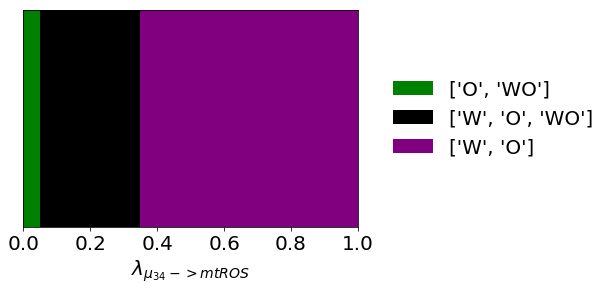

In [12]:
###########
fig = plt.figure()
labs = colorMap("data/d_noWO_u3m_red_legend.txt",reduced=True)
df = pd.read_csv("data/d_noWO_u3m_red.txt")
check=[]
for i in range(len(df)):
    if df['color'].values[i] not in check:
        plt.fill_between([df['X1'].values[i],df['X2'].values[i]],-10.,110.,facecolor=getColor(labs[df['color'].values[i]]),linewidth=0.0,label=labs[df['color'].values[i]])
        check+=[df['color'].values[i]]
    else:
        plt.fill_between([df['X1'].values[i],df['X2'].values[i]],-10.,110.,facecolor=getColor(labs[df['color'].values[i]]),linewidth=0.0)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),frameon=False)
plt.yticks([])
plt.xlim(0,1)
plt.ylim(0,100)

plt.xlabel("$\lambda_{\mu_{34}->mtROS}$")
fig.savefig("figures/noWO_u3m_red.png",bbox_inches='tight')

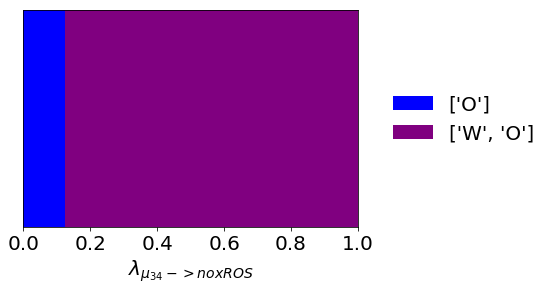

In [13]:
###########
fig = plt.figure()
labs = colorMap("data/d_noWO_u3n_red_legend.txt",reduced=True)
df = pd.read_csv("data/d_noWO_u3n_red.txt")
check=[]
for i in range(len(df)):
    if df['color'].values[i] not in check:
        plt.fill_between([df['X1'].values[i],df['X2'].values[i]],-10.,110.,facecolor=getColor(labs[df['color'].values[i]]),linewidth=0.0,label=labs[df['color'].values[i]])
        check+=[df['color'].values[i]]
    else:
        plt.fill_between([df['X1'].values[i],df['X2'].values[i]],-10.,110.,facecolor=getColor(labs[df['color'].values[i]]),linewidth=0.0)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),frameon=False)
plt.yticks([])
plt.xlim(0,1)
plt.ylim(0,100)
plt.xlabel("$\lambda_{\mu_{34}->noxROS}$")
fig.savefig("figures/noWO_u3n_red.png",bbox_inches='tight')